# $$\text{Taller 1 Métodos Computacionales}$$

<h1> $$\text{Autores:}$$ </h1>
<h2> $$\text{María Valentina García}$$ </h2>
<h2> $$\text{Ray David Diaz}$$ </h2>

# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 1: Caida libre 


### Caso ideal 

El tiempo de vuelo ideal es  10.251256281407034


Text(0, 0.5, 'Altura (m)')

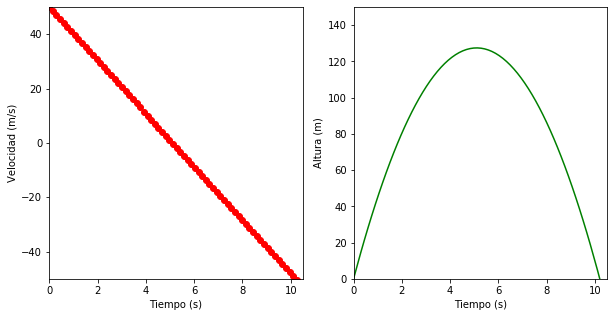

In [2]:
#Tiempo 

t=np.linspace(0.0,30,200)



#Velocidad análitica

V0=50.0 #Velocidad inical m/s

def velo(V0_,t_):
	g=9.81 #Aceleración m/s² 
	v=V0-g*t
	return v

#Posición vertical 

Y0=0.0 #Altura inicial m 	
 	
def posi(Y0_,V0_,t_):
	g=9.81
	y=Y0+V0*t-0.5*g*t**2
	return y
 
Videal=velo(V0,t)
Yideal=posi(Y0,V0,t)

#Tiempo de vuelo ideal

for i in range(len(t)):
	g=9.81
	if Yideal[i]<=0 and i!=0:
		print("El tiempo de vuelo ideal es ",t[i])
		if t[i+1]>=((V0*2)/g):
			break


#Graficas 
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,Videal,'ro')
plt.xlim(0,10.5)
plt.ylim(-50,50)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.subplot(1,2,2)
plt.plot(t,Yideal, 'g')
plt.xlim(0,10.5)
plt.ylim(0,150)
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")

### Caso real 

El tiempo de vuelo con drag es  27.437185929648237


Text(0, 0.5, 'Altura (m)')

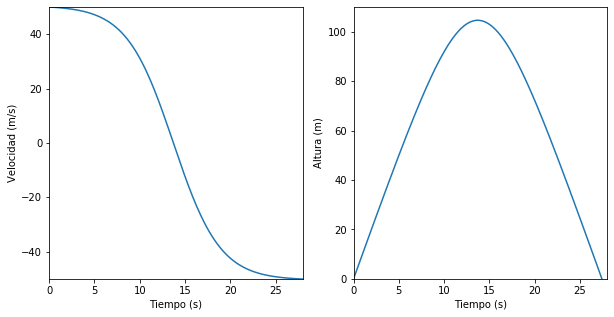

In [3]:
#Variables 
C_d=0.8 #Coeficiente de drag
R=0.05 #radio en m
A=np.pi*R**2
rho=1.225 #Densidad del aire kg/m³
m=1.0 #masa en kg
gamma=np.sqrt((C_d*rho*A)/(2*m))
g=9.81 

def vel(gamma_,V0_,t_):
	g=9.81 
	c1=np.sqrt(g)/gamma
	c2=gamma*np.sqrt(g)
	c3=(gamma*V0)/np.sqrt(g)
	if c3 > -1.0 and c3 < 1.0:
		v=c1*np.tanh(-c2*t+np.arctanh(c3))
	else:
		print("c3 debe estar entre -1 y 1")
	return v
	

def pos(gamma_,Y0_,V0_,t_):
	g=9.81
	c1=1/gamma**2
	c2=gamma*np.sqrt(g)
	c3=(gamma*V0)/np.sqrt(g)
	if c3 > -1.0 and c3 < 1.0:
		c4=np.arctanh(c3)
	else:
		print("c3 debe estar entre -1 y 1")
	y=Y0+c1*np.log(np.cosh(c4)/np.cosh(-c2*t+c4))
	return 2*y/g

	

V=vel(gamma,V0,t)
Y=pos(gamma,Y0,V0,t)

#Tiempo de vuelo real 
for i in range(len(t)):
	if Y[i]<=0 and i!=0:
		print("El tiempo de vuelo con drag es ",t[i])
		if t[i+1]>= t[i]:
			break


#Graficas 
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,V)
plt.xlim(0,28)
plt.ylim(-50,50)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.subplot(1,2,2)
plt.plot(t,Y)
plt.xlim(0,28)
plt.ylim(0,120)
plt.ylim(0,110)
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")


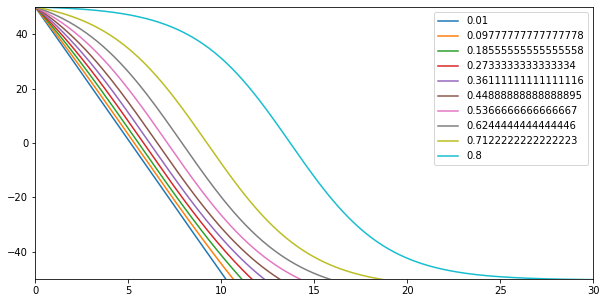

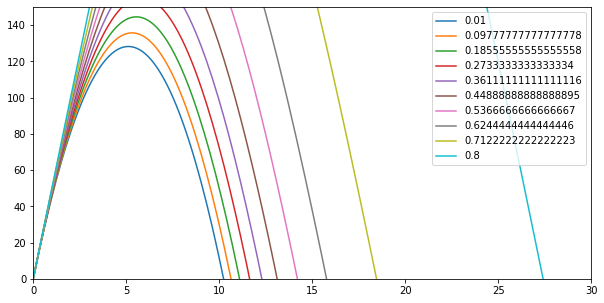

In [4]:
#################### Comportamiento de C respecto al tiempo de vuelo ####################################3

#c es numero entre 0 y 1

cd=np.linspace(0.01,0.8,10)

#print(cd)

#Calculo de constantes
Gama_cd=np.sqrt((cd*rho*A)/(2*m))
C1_cd=np.sqrt(g)/Gama_cd
C2_cd=Gama_cd*np.sqrt(g)
C3_cd=(Gama_cd*V0)/np.sqrt(g)
C4_cd=1/Gama_cd**2

#print(Gama_cd)
#print(C3_cd)

v_drag=np.zeros((len(t),len(cd)))
y_drag=np.zeros((len(t),len(cd)))

for i in range(len(t)):
	v_drag[i,:]=C1_cd[:]*np.tanh(-C2_cd[:]*t[i]+np.arctanh(C3_cd[:]))
	
#print(v_drag)


for i in range(len(t)):
	y_drag[i,:]=C4_cd[:]*np.log(np.cosh(np.arctanh(C3_cd[:]))/np.cosh(-C2_cd[:]*t[i]+np.arctanh(C3_cd[:])))/1


#print(y_drag)
	
	

#Graficas 
fig = plt.figure(figsize=(10,5))
for k in range(len(cd)):
	plt.plot(t,v_drag[:,k],label=cd[k])
plt.xlim(0,30)
plt.ylim(-50,50)
plt.legend()
fig = plt.figure(figsize=(10,5))
for k in range(len(cd)):
	plt.plot(t,y_drag[:,k],label=cd[k])
plt.xlim(0,30)
plt.ylim(0,150)
plt.legend()




Text(0.5, 0, 'Cd')

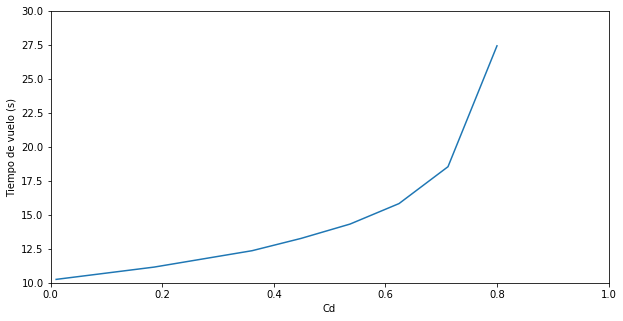

In [5]:
#tiempo de vuelo 
tv_cd=np.zeros(len(cd))
for k in range(len(tv_cd)):
    for i in range(len(t)):
        if y_drag[i,k]<=0 and i!=0:
            tv_cd[k]=t[i]
            if t[i+1]>= t[i]:
                break
            k+1

#print(tv_cd)

fig = plt.figure(figsize=(10,5))
plt.plot(cd,tv_cd)
plt.xlim(0,1)
plt.ylim(10,30)
plt.ylabel("Tiempo de vuelo (s)")
plt.xlabel("Cd")


Observaciones:

Se muestra un incremento exponencial a medida que aumenta cd el tiempo diverge. 

# Punto 2: Numeros primos y fibonacci


###  Punto A

In [6]:
#n1: numero de primos a calcular
def calcular_primos(n1):
    primos_calculados=0
    primos=[]
    actual=2
    while primos_calculados<n1:
        cont_divisores=0
        for i in range(1,actual):
            if(actual!=i and actual%i==0):
                cont_divisores+=1
        if(cont_divisores==1):
            primos.append(actual)
            primos_calculados+=1
        actual+=1
    return primos

print(calcular_primos(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

### Punto B

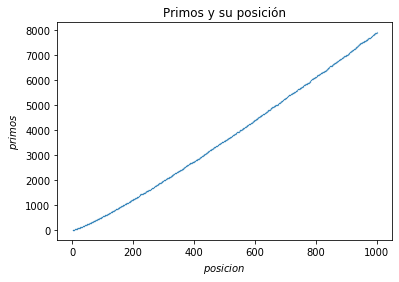

In [7]:
#n2: numero de primos a calcular
def plot_primos(n2):
    primos=calcular_primos(n2)
    posicion=[i for i in range(1,n2+1)]
    plt.plot(posicion,primos, 'o', markersize=0.2)
    plt.ylabel("$primos$")
    plt.xlabel("$posicion$")
    plt.title("Primos y su posición")
    plt.show()

plot_primos(1000)

La regularidad es la correlación lineal que se nota claramente en la gráfica

### Punto C
<p>Número aureo con sucesión de Fibonacci</p>
$$ \varphi= \frac{F_{n+1}}{F_n} $$

In [8]:
#n: numero de sucesión a calcular
def sucesion_fibonacci(n):
    sucesion=0
    if(n==0):
        sucesion=0
    elif(n==1):
        sucesion=1
    else:
        sucesion=sucesion_fibonacci(n-1)+sucesion_fibonacci(n-2)
    return sucesion

#n3: numero de sucesiones a calcular
def calculo_fibonacci(n3):
    fibonacci=[]
    for i in range(n3):
        fibonacci.append(sucesion_fibonacci(i))
    return fibonacci
            
print(calculo_fibonacci(30))

#n_3: numero de la sucesion con la cual calcular el número aureo
def calculo_numero_aureo(n_3):
    numero_aureo=[]
    for i in range(1,n_3+1):
        numero_aureo.append(sucesion_fibonacci(i+1)/sucesion_fibonacci(i))
    return numero_aureo

print(calculo_numero_aureo(30))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
[1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614, 1.6180371352785146, 1.618032786885246, 1.618034447821682, 1.6180338134001253, 1.618034055727554, 1.6180339631667064, 1.6180339985218033, 1.618033985017358, 1.6180339901755971, 1.618033988205325, 1.618033988957902, 1.6180339886704431, 1.6180339887802426, 1.618033988738303, 1.6180339887543225, 1.6180339887482036, 1.6180339887505408]


El número aureo es el número divino, establecido por la naturaleza. 

### Punto D 
<p> Error estimado </p>
$$ \epsilon= \frac{|Estimated\; -\; Real|}{Real} $$

In [11]:
from tqdm import tqdm
#n4: numero de la sucesion con la cual calcular el número aureo
phi_real=(1+np.sqrt(5.))/2
def calculo_error(n4):
    error=[]
    for i in tqdm(range(n4)):
        phi_estimado=calculo_numero_aureo(n4)[i]
        epsilon=np.abs(phi_estimado-phi_real)/phi_real
        error.append(epsilon)
    return error

print(calculo_error(30))#Se demora porque calcula los errores de los números calculados con las primeras 30 sucesiones

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:14<00:00, 10.49s/it]

[0.38196601125010515, 0.23606797749978967, 0.07294901687515776, 0.030056647916491423, 0.01114561800016822, 0.004305231718579094, 0.0016374027886314115, 0.0006264579760202099, 0.0002391358457583512, 9.136361346616536e-05, 3.48946069117676e-05, 1.3329018927062451e-05, 5.091164333229031e-06, 1.9446616335226094e-06, 7.427932029059675e-07, 2.8372196766005973e-07, 1.0837211752813756e-07, 4.139446987041184e-08, 1.581128000676001e-08, 6.039371522179324e-09, 2.306834697009074e-09, 8.811324316167856e-10, 3.3656273507239563e-10, 1.285554991381755e-10, 4.9103899573243705e-11, 1.8755925119329914e-11, 7.164150246971759e-12, 2.7363883904725003e-12, 1.045289386671466e-12, 3.9920530731617365e-13]


### Punto E

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:32<00:00,  7.09s/it]


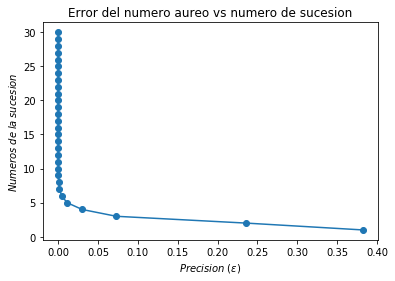

In [12]:
#-------------------------graficar el error

def plot_error(n5):
    errores=calculo_error(n5)
    nums_sucesion=[i for i in range(1,n5+1)]
    plt.plot(errores,nums_sucesion, 'o-')
    plt.xlabel("$Precision\;(\epsilon)$")
    plt.ylabel("$Numeros\;de\;la\;sucesion$")
    plt.title("Error del numero aureo vs numero de sucesion")
    plt.show()

plot_error(30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:34<00:00,  7.16s/it]


Text(0, 0.5, '$1/\\sqrt{x}$')

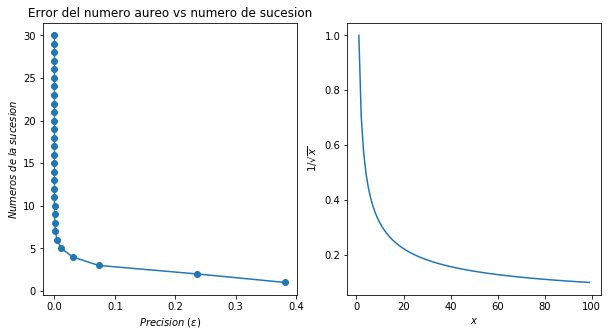

In [13]:
fig = plt.figure(figsize=(10,5))

x=[i for i in range(1,100)]

plt.subplot(1, 2, 1)
errores=calculo_error(30)
nums_sucesion=[i for i in range(1,30+1)]
plt.plot(errores,nums_sucesion, 'o-')
plt.xlabel("$Precision\;(\epsilon)$")
plt.ylabel("$Numeros\;de\;la\;sucesion$")
plt.title("Error del numero aureo vs numero de sucesion")

plt.subplot(1, 2, 2)
plt.plot(x,1/np.sqrt(x))
plt.xlabel("$x$")
plt.ylabel("$1/\\sqrt{x}$")

Efectivamente tiene la forma de $\frac{1}{\sqrt{x}}$

# Punto 3: Fitting


### Punto A y B

In [14]:
from scipy.optimize import curve_fit

Text(0.5, 1.0, 'Original')

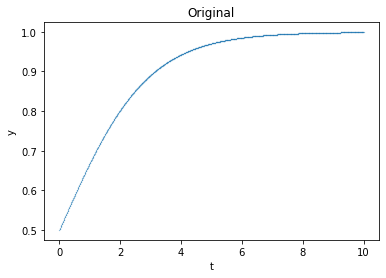

In [15]:
data=np.loadtxt("Hw_data.dat")
t=data[:,0]
y=data[:,1]

plt.plot(t,y, 'o', markersize=0.2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Original")

### Punto C 
<p> Ajuste para encontrar A y B </p>
$$ f(t)=\frac{A}{1+e^{-Bt}} $$

A=0.9999999401926463, B=0.7000007635889562


Text(0.5, 1.0, 'Fitted')

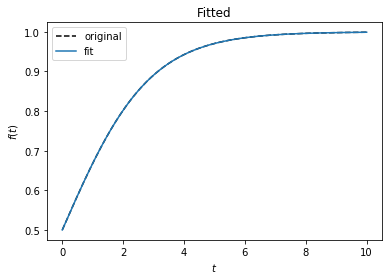

In [16]:
def function(t_,A_,B_):
    return (A_/(1+np.exp(-B_*t_)))

popt, pcov = curve_fit(function, t, y)

print("A={}, B={}".format(*popt))

f=function(t,*popt)

plt.plot(t,y,'--',c="k", label="original")
plt.xlabel("$t$", size=10)
plt.ylabel("$f(t)$")
plt.plot(t,f,label="fit")
plt.legend()
plt.title("Fitted")

# Punto 4: Newton-Raphson 


LAs raices son  [-1.8471270886958588, -2.2694940686074024e-06, 0.18046042583541735]


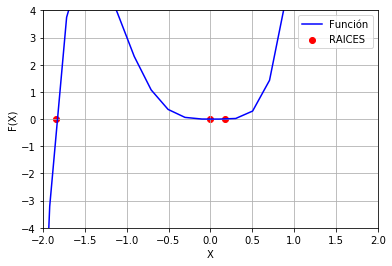

In [17]:
# definir función

def FUNC(x):
	return 3*x**5+5*x**4-x**3
	
def DERIVATIVE(f,x,h):
	d=0.01
	if (h!=0):
		d=(f(x+h)-f(x-h))/(2*h)
	return d

def NR(f,df,xn,error,it,precision=0.0001,iterations=1000):
    h_ = 1.0e-4
    while error > precision and it < iterations:  
        try:   
            xn1 = xn - f(xn)/df(f,xn,h_) 
            error = np.abs((xn1-xn)/xn1)
            #print(xn1)
        except ZeroDivisionError:
            print("Hay division por cero")   
        xn = xn1
        it += 1
    return xn1

#Roots 

C=100 #numero de puntos
x=np.linspace(-10,10,C)

for i in x:
	roots=[NR(FUNC,DERIVATIVE,i,100,1),0]
	#print(roots, i )
	xnew=[NR(FUNC,DERIVATIVE,-2,100,1),NR(FUNC,DERIVATIVE,-0.5,100,1),NR(FUNC,DERIVATIVE,2,100,1)]
print("LAs raices son ",xnew)
y_ceros=np.zeros(len(xnew))


#Grafica 

plt.plot(x,FUNC(x),'b',label="Función")
plt.scatter(xnew,y_ceros,marker='o', color='red',label="RAICES")
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.legend()
plt.xlabel("X")
plt.ylabel("F(X)")
plt.grid()
plt.savefig("Grafica_Newton_Raphson.png")

# Punto 5: Derivadas en c++ y graficar en Python

$$ f(x)=x-sin(x)$$


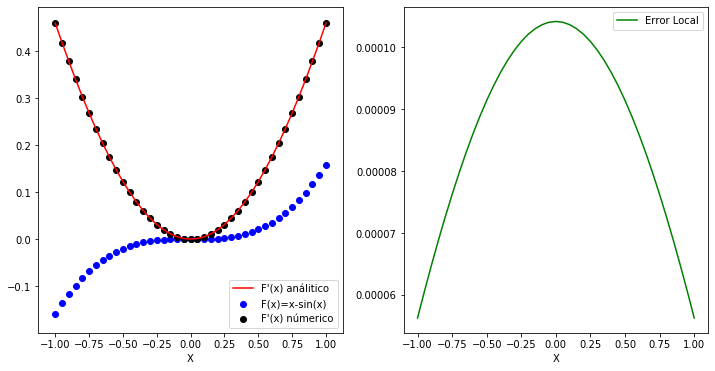

In [18]:
data=np.loadtxt('datosderivada.txt')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],label="F(x)=x-sin(x)", color="blue")
plt.scatter(data[:,0],data[:,3],label="F'(x) númerico", color="black")
plt.plot(data[:,0],data[:,2],label="F'(x) análitico", color="red")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(data[:,0],data[:,-1],label="Error Local", color="green")
plt.xlabel("X")
plt.legend()
plt.savefig("Grafica_derivada_errorlocal.png")
plt.show()



# Punto 6: Integración

### Punto 1 

$$ \int_{0}^{1} e^{-x^{2}} dx$$

In [19]:
def func(x_):
    return np.exp(-(x_**2))

def simpson13(f,X):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0.
    integral += f(X[0])+f(X[-1])
    
    for i in range( len(X[1:-1]) ):
        if(i%2 == 0):
            integral += 4.*f(X[i+1])
                  
        else:
            integral += 2.*f(X[i+1])
            
    integral *= h/3.
    
    return integral

def simpson38(f,x_,):
    a=x_[0]
    b=x_[-1]
    h = (b-a)/(len(x_)-1)
    integral=0
    integral+=f(a)+f(b)
    
    for i in range(len(x_[1:-1])):
        if(i%3==0):
            integral += 2.*f(x_[i+1])
        else:
            integral += 3.*f(x_[i+1])
    integral*= 3*h/8
    
    return integral


X=np.linspace(0,1,120)
h=0.01

print("La integral con la Regla de Simpson de 3/8 da como resultado: {}".format(simpson38(func,X)))
print("La integral con la Regla de Simpson de 1/3 da como resultado: {}".format(simpson13(func,X)))

La integral con la Regla de Simpson de 3/8 da como resultado: 0.7439439262277125
La integral con la Regla de Simpson de 1/3 da como resultado: 0.7457849986755161


In [20]:
def D4(f,x,h_):
    
    d = 0.
    
    if(h_!=0):
        d = ( f(x+2*h_) - 4*f(x+h_) + 6*f(x) - 4*f(x-h_) + f(x-2*h_) )/h_**4
        
    return d
D4Y = D4(func,X,h)
def ErrorSimpson13(x_,D4Y,h_):
    
    max_ = np.max(np.abs(D4Y))
    
    error = ((x_[-1]-x_[0]) * h_**4 * max_ )/180.
    
    return error

def ErrorSimpson38(x_,D4Y,h_):
    
    max_ = np.max(np.abs(D4Y))
    
    error = ((x_[-1]-x_[0]) * h_**4 * max_ )/80.
    
    return error

print("La integral con la Regla de Simpson de 3/8 da como resultado: {}".format(ErrorSimpson38(X,D4Y,h)))
print("La integral con la Regla de Simpson de 1/3 da como resultado: {}".format(ErrorSimpson13(X,D4Y,h)))

La integral con la Regla de Simpson de 3/8 da como resultado: 1.499750025557578e-09
La integral con la Regla de Simpson de 1/3 da como resultado: 6.665555669144791e-10


El error de la Regla de Simpson de $\frac{3}{8}$ es mayor al de la Regla de Simpson de $\frac{1}{3}$. Sin embargo, ambas tienen un orden de magnitud muy pequeño

### Punto 2 

PUNTO A

$p_0(x)=1 \Rightarrow$ No tiene ceros.

$p_1(x)=x \Rightarrow$ El cero es $x=0$.

$p_2(x)=\frac{1}{2}(3x^2-1) \Rightarrow$ Los ceros de la función están en $x=\sqrt{\frac{1}{3}}$, $x=- \sqrt{\frac{1}{3}}$.

$p_3(x)=\frac{1}{2}(5x^3 -3x) \Rightarrow$ Los ceros de la función están en $x=0$, $x=\sqrt{\frac{3}{5}}$, $x=- \sqrt{\frac{3}{5}}$.

PUNTO B

$p(x)=1+2x+x^2$ en la base de Legendre es:

$p(x)= \frac{2}{3}p_2(x) + 2p_1(x) + \frac{4}{3}p_0(x)$


PUNTO C

$P_2'(x)= 3x$

$P_3'(x)= \frac{1}{2}(15x^2-3)$

In [21]:
x_3=[np.sqrt(1./3),-np.sqrt(1./3)]
x_4=[0, np.sqrt(3./5), -np.sqrt(3./5)]
#n=2,3

def p2_prima(x):
    return 3*x

def p3_prima(x):
    return (1/2)*(15*x**2-3)

def wk(x_,f):
    wk_=[]
    for x in x_:
        wk_.append(2/((1-x**2)*(f(x)**2)))
        
    return wk_

print("Los pesos para n=2 son $w_1=${}, $w_2=${}".format(*wk(x_3,p2_prima)))
print("Los pesos para n=3 son $w_1=${}, $w_2=${}, $w_3=${}".format(*wk(x_4,p3_prima)))

Los pesos para n=2 son $w_1=$1.0, $w_2=$1.0
Los pesos para n=3 son $w_1=$0.8888888888888888, $w_2=$0.5555555555555554, $w_3=$0.5555555555555554


PUNTO D

In [22]:
import sympy as sym
import math

def CreatePoly(n):
    
    x = sym.Symbol('x',real=True)
    y = sym.Symbol('y',real=True)
    
    y = (x**2-1)**n
    
    poly = sym.diff(y,x,n)/(2**n * math.factorial(n))
    
    return poly

Legendre = [CreatePoly(i) for i in range(11)]
    
 
x = sym.Symbol('x',real=True)
dLegendre=[sym.diff(l,x,1) for l in Legendre]

roots=[]
for p in range(1,12):
    coef=[Legendre[p-1].expand().coeff(x,n) for n in range(p)][::-1]
    root=np.roots(coef)
    roots.append(root)

def wk_2(x_,f):
    wk_2=[]
    for xk in x_:
        wk_2.append(2/((1-xk**2)*(f.xreplace({x: xk})**2)))
    return wk_2

print("CALCULANDO TODO CON SYMPY:\n")

for deg in range(1,11):
    w=wk_2(roots[deg],dLegendre[deg])
    print("Las funciones peso para n={} son:\n {}\n".format(deg,w))
    
print("USANDO LEGAUSS:\n")

for deg in range(1,11):
    x, w = np.polynomial.legendre.leggauss(deg)
    print("Las funciones peso para n={} son:\n {}\n".format(deg,w))

CALCULANDO TODO CON SYMPY:

Las funciones peso para n=1 son:
 [2.00000000000000]

Las funciones peso para n=2 son:
 [1.00000000000000, 1.00000000000000]

Las funciones peso para n=3 son:
 [0.555555555555555, 0.555555555555556, 0.888888888888889]

Las funciones peso para n=4 son:
 [0.347854845137452, 0.347854845137453, 0.652145154862546, 0.652145154862546]

Las funciones peso para n=5 son:
 [0.236926885056188, 0.478628670499366, 0.236926885056190, 0.478628670499367, 0.568888888888889]

Las funciones peso para n=6 son:
 [0.171324492379167, 0.360761573048139, 0.171324492379171, 0.360761573048140, 0.467913934572691, 0.467913934572691]

Las funciones peso para n=7 son:
 [0.129484966168869, 0.279705391489276, 0.381830050505119, 0.129484966168873, 0.279705391489276, 0.381830050505119, 0.417959183673469]

Las funciones peso para n=8 son:
 [0.101228536290374, 0.222381034453372, 0.101228536290378, 0.222381034453374, 0.313706645877888, 0.313706645877887, 0.362683783378362, 0.362683783378362]

Las

Vemos que encontramos exactamente los mismos valores con los dos métodos. El método "tradicional" o usando sympy da pesos con un mayor número de cifras decimales.

PUNTO E

$$ \int_{0}^{\infty} \frac{1}{x^4 +1} dx $$

Usamos cuadratura de Gauss-Laguerre

Se hallan las raices($x_k$) y los pesos($w_k$) con $\textit{np.polynomial.laguerre.laggauss}$ y se halla la integral de la forma:

$$I=\sum_{k=1}^{n} e^{-x_k}w_k f(x_k + 0)$$

In [23]:
a = 0

def funcion(x_):
    return 1/(x_**4+1)

for deg in range (1,11):
    x, w = np.polynomial.laguerre.laggauss(deg)
    t=x+a
    Integral= sum(w*np.exp(x)*funcion(t))    
    print("Para n={} la integral es:{}".format(deg,round(Integral,6)))

x, w = np.polynomial.laguerre.laggauss(100)
t=x+a
Integral= np.sum(w*np.exp(x)*funcion(t))    
print("Para n=100 la integral es:{}".format(round(Integral,6)))

Para n=1 la integral es:1.359141
Para n=2 la integral es:1.404315
Para n=3 la integral es:1.146217
Para n=4 la integral es:1.032277
Para n=5 la integral es:1.022582
Para n=6 la integral es:1.06031
Para n=7 la integral es:1.102694
Para n=8 la integral es:1.129052
Para n=9 la integral es:1.137197
Para n=10 la integral es:1.13333
Para n=100 la integral es:1.110721
